# Standard market methods for optimizing the cryptocurrency portfolio.

> Standard market methods for optimizing the cryptocurrency portfolio.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Zmey56
- categories: [cryptocurrency, portfolio]

For a long time I have been engaged in the formation of portfolios for clients consisting of stocks and ETFs. I stayed away from the cryptocurrency market, as many warned about its unreliability. The same Warren Buffett. But times are changing and I decided to see what's going on on it. The first task I tried to look at was the prospect of portfolio investment in cryptocurrencies. For analysis, I took cryptocurrencies with maximum capitalization as of [December 30, 2020](https://coinmarketcap.com/historical/20201231/) and for which there is data for at least three years:

* BTC-USD
* ETH-USD
* USDT-USD
* XRP-USD
* LTC-USD
* BCH-USD
* ADA-USD
* BNB-USD
* LINK-USD

At the beginning, I connect the necessary libraries and get data for analysis from yahoo finance.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cryptocurrency = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'ADA-USD', 'BNB-USD', 'LINK-USD']

In [ ]:
data= yf.download(cryptocurrency, start="2018-01-01", end="2020-12-31")['Close']

[*********************100%***********************]  9 of 9 completed


In [ ]:
data.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
Date,,,,,,,,,
2018-01-01,0.728657,2432.540039,8.41461,13657.200195,772.640991,0.733563,229.033005,1.007280,2.39103
2018-01-02,0.782587,2711.000000,8.83777,14982.099609,884.443970,0.673712,255.684006,1.004900,2.48090
2018-01-03,1.079660,2608.689941,9.53588,15201.000000,962.719971,0.681167,245.367996,1.013440,3.10537
2018-01-04,1.114120,2430.179932,9.21399,15599.200195,980.921997,0.984368,241.369995,1.002530,3.19663
2018-01-05,0.999559,2584.479980,14.91720,17429.500000,997.719971,0.907486,249.270996,0.998634,3.04871


Next, I will plot the price change of the received cryptocurrencies from 2018 to 2020.

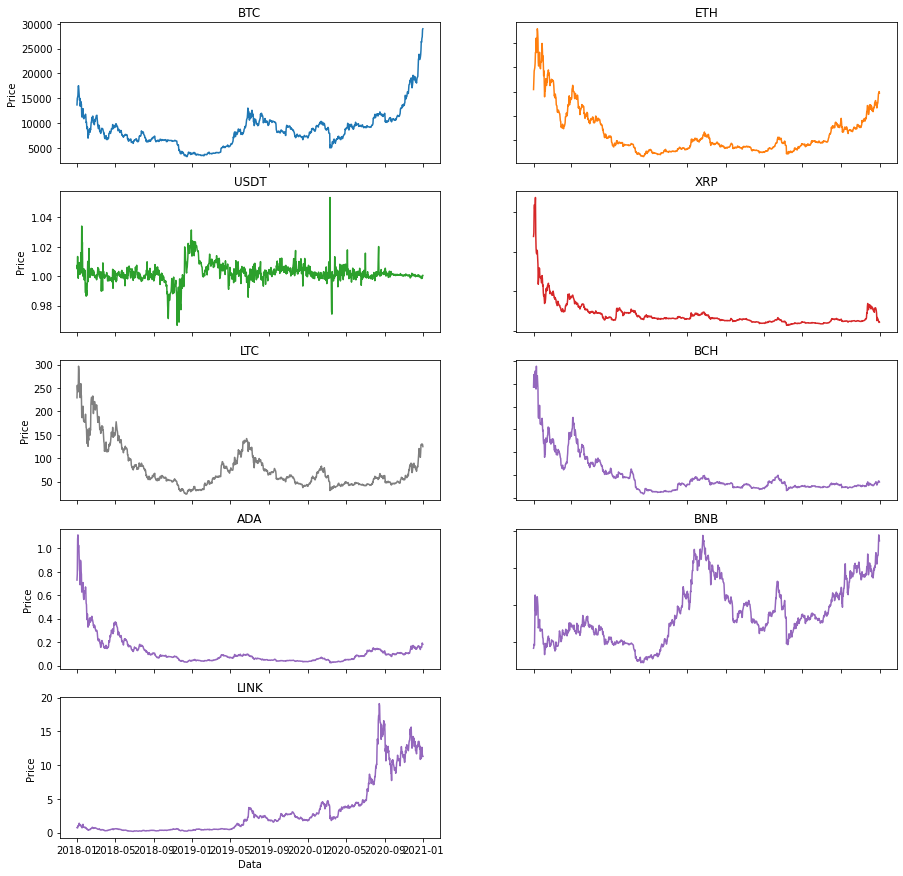

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))

axs[0, 0].plot(data.index, data['BTC-USD'], 'tab:blue' )
axs[0, 0].set_title('BTC')
axs[0, 1].plot(data.index, data['ETH-USD'], 'tab:orange')
axs[0, 1].set_title('ETH')
axs[1, 0].plot(data.index, data['USDT-USD'], 'tab:green')
axs[1, 0].set_title('USDT')
axs[1, 1].plot(data.index, data['XRP-USD'], 'tab:red')
axs[1, 1].set_title('XRP')
axs[2, 0].plot(data.index, data['LTC-USD'], 'tab:grey')
axs[2, 0].set_title('LTC')
axs[2, 1].plot(data.index, data['BCH-USD'], 'tab:purple')
axs[2, 1].set_title('BCH')
axs[3, 0].plot(data.index, data['ADA-USD'], 'tab:purple')
axs[3, 0].set_title('ADA')
axs[3, 1].plot(data.index, data['BNB-USD'], 'tab:purple')
axs[3, 1].set_title('BNB')
axs[4, 0].plot(data.index, data['LINK-USD'], 'tab:purple')
axs[4, 0].set_title('LINK')
fig.delaxes(axs[4,1])


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

Next, you need to get the percentage change in the value of the asset for the trading day. It is calculated using the pct_change() function from the Pandas package. The profitability indicator allows you to better understand and investigate changes over time. It also allows you to compare different assets with each other.

In [ ]:
return_data = data.pct_change()
return_data.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
Date,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.074013,0.114473,0.050289,0.097011,0.144702,-0.081589,0.116363,-0.002363,0.037586
2018-01-03,0.379604,-0.037739,0.078992,0.014611,0.088503,0.011066,-0.040347,0.008498,0.251711
2018-01-04,0.031917,-0.068429,-0.033756,0.026196,0.018907,0.445120,-0.016294,-0.010765,0.029388
2018-01-05,-0.102826,0.063493,0.618973,0.117333,0.017125,-0.078103,0.032734,-0.003886,-0.046274


In order to analyze the dependence, we construct a covariance matrix. It will be needed in the future for the study of portfolios.

In [ ]:
var_matrix = return_data.cov()
var_matrix

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
ADA-USD,0.003499,0.002599,0.001866,0.001644,0.002345,2.325575e-03,0.002292,-1.432984e-05,0.002447
BCH-USD,0.002599,0.003890,0.002003,0.001872,0.002409,2.261358e-03,0.002552,-1.056895e-05,0.002285
BNB-USD,0.001866,0.002003,0.003237,0.001412,0.001790,1.875681e-03,0.001888,-1.071456e-05,0.001596
BTC-USD,0.001644,0.001872,0.001412,0.001504,0.001576,1.501832e-03,0.001628,-2.623424e-06,0.001373
ETH-USD,0.002345,0.002409,0.001790,0.001576,0.002435,2.151127e-03,0.002132,-1.504240e-05,0.002014
LINK-USD,0.002326,0.002261,0.001876,0.001502,0.002151,5.462779e-03,0.001945,-3.780223e-07,0.001991
LTC-USD,0.002292,0.002552,0.001888,0.001628,0.002132,1.945389e-03,0.002717,-1.060501e-05,0.001995
USDT-USD,-0.000014,-0.000011,-0.000011,-0.000003,-0.000015,-3.780223e-07,-0.000011,2.541547e-05,-0.000017
XRP-USD,0.002447,0.002285,0.001596,0.001373,0.002014,1.990731e-03,0.001995,-1.685244e-05,0.003213


After that, you can analyze by generating random weights of each cryptocurrency in the portfolio and calculating profitability and volatility for them. The execution may take a long time.

In [ ]:
# Initialize an empty list for storing the portfolio return
port_return = []

# Initialize an empty list for storing the portfolio volatility
port_volatility = []

# Initialize an empty list for storing the Sharpo Ratio
# port_sharpo = []

# Initialize an empty list for storing the portfolio weights
port_weights = []


num_assets = len(data.columns)
num_portfolio = 1000000

individual_rets = data.resample('Y').last().pct_change().mean()

In [ ]:
for port in range(num_portfolio):
  # Randomly generate weigh combination
  weights = np.random.random(num_assets)
  # Normalize weight so that they sum to 1
  weights = weights/np.sum(weights)
  port_weights.append(weights)
  # Return are the dot product of individual expected returns of asset and its weights
  returns = np.dot(weights, individual_rets)
  port_return.append(returns)
  # Computing Portfolio Volatility
  portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(var_matrix*252,weights)))  
  port_volatility.append(portfolio_volatility)

In [ ]:
# Creating dictionary of returns and volatility
portfolio = {'Returns': port_return,'Volatility': port_volatility}

for counter, symbol in enumerate(data.columns.tolist()):
  portfolio[symbol] = [w[counter] for w in port_weights]

In [ ]:
# Converting dictionarity to DataFrame
portfolios_V1 = pd.DataFrame(portfolio)
portfolios_V1.head()

,Returns,Volatility,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
0,1.275088,0.602960,0.017891,0.039905,0.200064,0.242443,0.067836,0.020042,0.167108,0.122166,0.122545
1,1.610102,0.728987,0.145538,0.129820,0.159796,0.051294,0.176501,0.057838,0.161469,0.024209,0.093534
2,1.499318,0.635478,0.095152,0.109144,0.132523,0.044551,0.154209,0.084376,0.141027,0.147222,0.091795
3,1.889512,0.605490,0.297959,0.005144,0.138898,0.012262,0.217998,0.094497,0.009871,0.222222,0.001150
4,1.992998,0.646593,0.188491,0.004146,0.115700,0.178634,0.062736,0.165734,0.054014,0.111589,0.118957


After that, you can choose a portfolio with minimal volatility, maximum Sharpe ratio and maximum profitability.

In [ ]:
# risk factor
rf = 0.02
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
max_ret_port = portfolios_V1.iloc[portfolios_V1['Returns'].idxmax()]

In [ ]:
#weights in a portfolio with minimal volatility
weights_min_vol = np.array(min_vol_port[2:])

#weights in a portfolio with max Sharpe Ratio
weights_opt_sr = np.array(optimal_risky_port[2:])

#weights in a portfolio with max Returns
weights_max_ret = np.array(max_ret_port[2:])

We keep for these portfolios the weights that will be required in the analysis in 2021.

In [ ]:
df_weights = pd.DataFrame(columns=portfolios_V1.columns)
df_weights = df_weights.append(min_vol_port.rename("Minimum Volatility").to_frame().T)
df_weights = df_weights.append(max_ret_port.rename("Maximum Returns").to_frame().T)
df_weights = df_weights.append(optimal_risky_port.rename("Maximum Sharpe Ratio").to_frame().T)

We also calculate weights for a portfolio with maximum diversification and store weights for it in a separate variable.

In [ ]:
# convert to array return_data and var_matrix
array_returns = np.asarray(return_data.dropna())
array_cov = np.asarray(var_matrix)

In [ ]:
mean_returns = np.mean(array_returns, axis = 0)

In [ ]:
portfolios_V1_div = portfolios_V1.copy()

In [ ]:
# list for diversification ratio
div_ratio = []

In [ ]:
for i in range(portfolios_V1.shape[0]):
  weight_vector = list(portfolios_V1.iloc[i])[2:]
  portfolio_risk = np.sqrt(np.matmul((np.matmul(weight_vector,array_cov)), np.transpose(weight_vector)))
  ann_portfolio_risk = portfolio_risk*np.sqrt(252)*100
  portfolio_return = np.matmul(weight_vector, np.transpose(mean_returns))
  ann_portfolio_return = 252*portfolio_return * 100

  portfolio_asset_sdv = np.sqrt(np.diagonal(array_cov))
  portfolio_div_ratio = np.sum(np.multiply(portfolio_asset_sdv, weight_vector)) \
                         / portfolio_risk
  div_ratio.append(portfolio_div_ratio)

In [ ]:
portfolios_V1_div['Diversification Ratio'] = div_ratio

In [ ]:
div_port = portfolios_V1_div.iloc[portfolios_V1_div['Diversification Ratio'].idxmax()]
df_weights = df_weights.append(div_port[:-1].rename("Maximum Diversification").to_frame().T)

In [ ]:
div_port[-1]

1.327768493018246

In [ ]:
weights_div = np.array(portfolios_V1_div.iloc[portfolios_V1_div['Diversification Ratio'].idxmax()][2:-1])

All weights are added to the shared DataFrame.

In [ ]:
df_weights

,Returns,Volatility,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
Minimum Volatility,0.644970,0.338505,0.039403,0.032176,0.125483,0.025616,0.110709,0.013273,0.000806,0.539546,0.112987
Maximum Returns,3.404571,0.836631,0.054534,0.042329,0.084251,0.105939,0.002381,0.526967,0.139040,0.037424,0.007135
Maximum Sharpe Ratio,3.386314,0.772965,0.037133,0.016446,0.031833,0.288221,0.081801,0.474756,0.003064,0.056841,0.009905
Maximum Diversification,1.001002,0.395160,0.062588,0.038603,0.095675,0.125148,0.000771,0.083197,0.033849,0.446510,0.113658


For a visual representation, we will display pie charts with asset weights in portfolios.

In [ ]:
df_weights_circle = df_weights.drop(['Returns', 'Volatility'], axis = 1)

In [ ]:
df_weights_circle

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
Minimum Volatility,0.039403,0.032176,0.125483,0.025616,0.110709,0.013273,0.000806,0.539546,0.112987
Maximum Returns,0.054534,0.042329,0.084251,0.105939,0.002381,0.526967,0.139040,0.037424,0.007135
Maximum Sharpe Ratio,0.037133,0.016446,0.031833,0.288221,0.081801,0.474756,0.003064,0.056841,0.009905
Maximum Diversification,0.062588,0.038603,0.095675,0.125148,0.000771,0.083197,0.033849,0.446510,0.113658


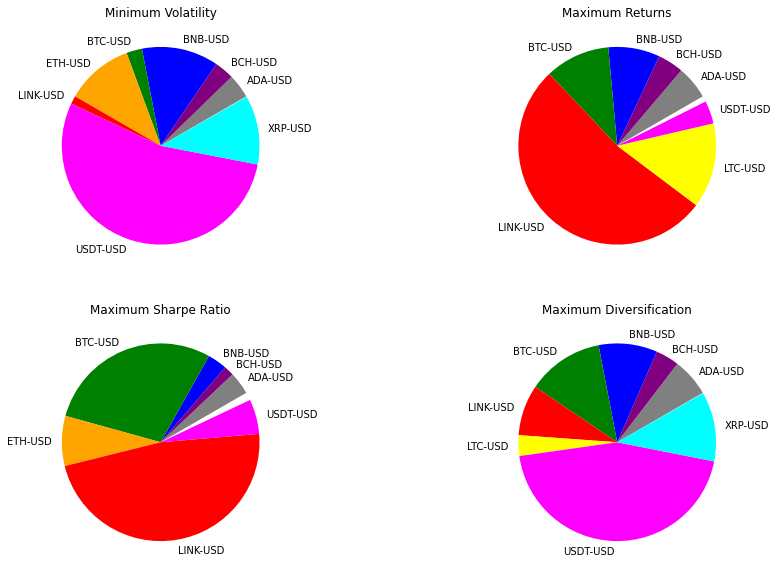

In [ ]:
color_pie =  ['Grey', 'Purple', 'Blue', 'Green', 'Orange', 'Red', 'Yellow', 'magenta', 'cyan']
color_pie_dict = dict(zip(df_weights_circle.columns, color_pie))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, (idx, row) in enumerate(df_weights_circle.iterrows()):
  ax = axes[i//2, i%2]
  row = row[row.gt(row.sum() * .01)]
  ax.pie(row, labels=row.index, colors=[color_pie_dict.get(i) for i in row.index], startangle=30)
  ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

---

Now comes the most interesting moment - to see how the portfolios behaved in 2021. Let's carry out the same steps - download the data, calculate their daily profitability.

In [ ]:
data_2021= yf.download(cryptocurrency, start="2020-12-31", end="2021-12-31")['Adj Close']

[*********************100%***********************]  9 of 9 completed


In [ ]:
data_2021.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
Date,,,,,,,,,
2020-12-31,0.181397,343.052643,37.376034,29001.720703,737.803406,11.270538,124.690323,1.000598,0.219846
2021-01-01,0.175350,341.985657,37.905010,29374.152344,730.367554,11.872555,126.230347,1.001916,0.237444
2021-01-02,0.177423,354.599945,38.241592,32127.267578,774.534973,12.220137,136.944885,1.000600,0.221655
2021-01-03,0.204995,421.789856,41.148979,32782.023438,975.507690,13.650172,160.190582,1.000514,0.225848
2021-01-04,0.224762,407.936920,40.926353,31971.914062,1040.233032,13.571063,154.807327,1.000128,0.236677


In [ ]:
return_data_2021 = data_2021.pct_change()
cum_daily_return = (1 + return_data_2021).cumprod()

In [ ]:
var_matrix_2021 = return_data_2021.cov()
var_matrix_2021.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,LTC-USD,USDT-USD,XRP-USD
ADA-USD,0.004716,0.002768,0.002637,0.001665,0.002368,0.003228,0.002598,0.000002,0.002582
BCH-USD,0.002768,0.004877,0.002842,0.002032,0.002843,0.003672,0.003561,-0.000002,0.003195
BNB-USD,0.002637,0.002842,0.005985,0.001942,0.002571,0.003302,0.002818,0.000001,0.002922
BTC-USD,0.001665,0.002032,0.001942,0.001772,0.001794,0.002110,0.001998,-0.000001,0.001828
ETH-USD,0.002368,0.002843,0.002571,0.001794,0.003136,0.003224,0.002733,-0.000001,0.002385


Then, using the previously obtained weights, we will calculate the profitability of portfolios at the end of the year and their volatility.

In [ ]:
individual_rets_2021 = data_2021.resample('Y').last().pct_change().mean()

In [ ]:
result_2021 = pd.DataFrame()

In [ ]:
for i in range(df_weights_circle.shape[0]):
  weight = np.array(df_weights_circle.iloc[i])
  ret = (np.dot(weight, individual_rets_2021))
  vol = np.sqrt(np.dot(weight.T,np.dot(var_matrix*252,weight))) 
  result_2021 = result_2021.append(pd.Series([ret, vol]).rename(df_weights_circle.iloc[[i]].index[0]).to_frame().T)
result_2021.columns = ['Returns', 'Volatility']

In [ ]:
result_2021

,Returns,Volatility
Minimum Volatility,2.626962,0.338505
Maximum Returns,1.925349,0.836631
Maximum Sharpe Ratio,1.516337,0.772965
Maximum Diversification,2.074494,0.395160


We will also plot the price change of portfolios during the year.

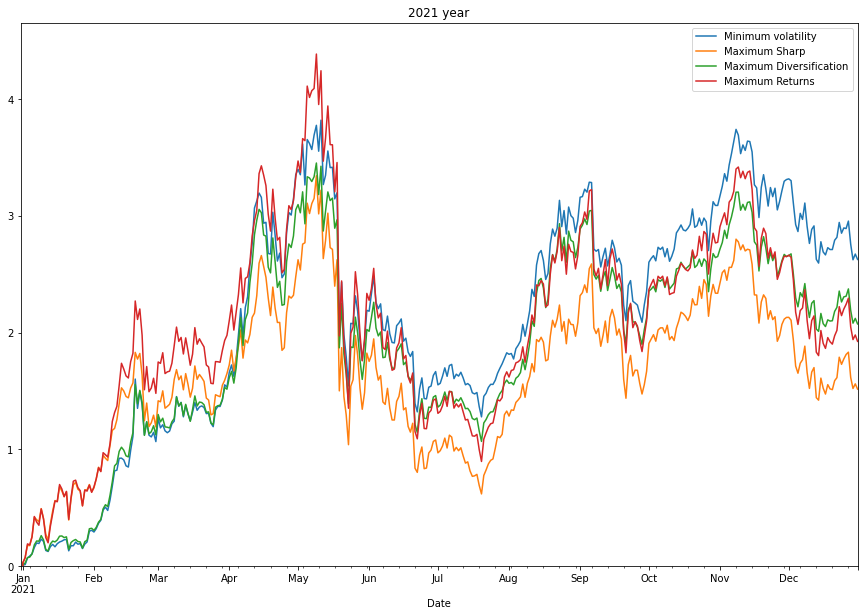

In [ ]:
fig, axs = plt.subplots(figsize=(15,10))

(cum_daily_return.multiply(weights_min_vol, axis=1).sum(axis=1) - 1).plot(label = 'Minimum volatility')
(cum_daily_return.multiply(weights_opt_sr, axis=1).sum(axis=1) - 1).plot(label = 'Maximum Sharp')
(cum_daily_return.multiply(weights_div, axis=1).sum(axis=1) - 1).plot(label = 'Maximum Diversification')
(cum_daily_return.multiply(weights_max_ret, axis=1).sum(axis=1) - 1).plot(label = 'Maximum Returns')

plt.title('2021 year')

plt.ylim(0)

plt.legend()

plt.show()

As can be seen from the results obtained, the portfolio showed the greatest profitability, which over the past years showed minimal volatility. In second place was a portfolio with maximum diversification. At the same time, all portfolios experienced maximum drawdown from May to June. I would like to warn you, this study is not an investment idea. Moreover, additional analyses using machine learning and time series analysis are still required.